In [1]:
# Make sure you have TensorFlow installed
# pip install tensorflow

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np


In [2]:
from tensorflow.keras.datasets import imdb

# Only keep the top 10,000 most frequent words
vocab_size = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
max_length = 200  # max length of review
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

In [4]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    LSTM(units=64),  # You can also use GRU instead
    Dense(1, activation='sigmoid')  # Binary classification (positive/negative)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64),
    LSTM(units=64),
    Dense(1, activation='sigmoid')
])

# Build the model manually to avoid warnings and show summary properly
model.build(input_shape=(None, max_length))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,089 (2.57 MB)

 Trainable params: 673,089 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64),
    LSTM(units=64),
    Dense(1, activation='sigmoid')
])

# Build shape manually
model.build(input_shape=(None, max_length))

# ✅ Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ✅ Now train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 89s 216ms/step - accuracy: 0.6984 - loss: 0.5393 - val_accuracy: 0.8680 - val_loss: 0.3163
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 85s 219ms/step - accuracy: 0.9081 - loss: 0.2385 - val_accuracy: 0.8717 - val_loss: 0.3091
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 167s 283ms/step - accuracy: 0.9388 - loss: 0.1700 - val_accuracy: 0.8664 - val_loss: 0.3647
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 90s 229ms/step - accuracy: 0.9515 - loss: 0.1325 - val_accuracy: 0.8574 - val_loss: 0.3724
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 139s 221ms/step - accuracy: 0.9592 - loss: 0.1120 - val_accuracy: 0.8572 - val_loss: 0.4012


In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8569 - loss: 0.4046
Test Accuracy: 0.8572


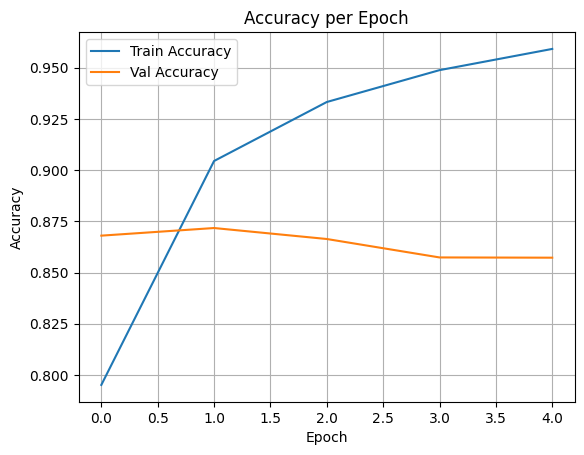

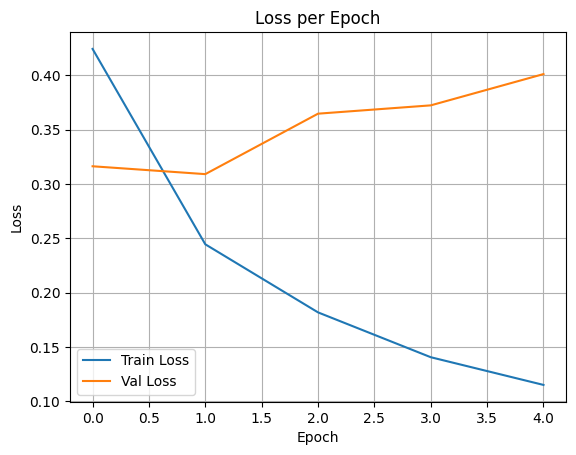

In [9]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample custom text
texts = ["The movie was fantastic!", "I did not like the plot."]

# Fit tokenizer on your training text if you had custom data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)  # Use your own dataset here

# Convert to sequences and pad
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length)

# Predict
predictions = model.predict(padded)

# Show predictions
for i, text in enumerate(texts):
    print(f"{text} --> Sentiment score: {predictions[i][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
The movie was fantastic! --> Sentiment score: 0.4965
I did not like the plot. --> Sentiment score: 0.4536
